loading dataset MNIST with classes '0' and '9'
30.8% of total variance is explained by 2 principal components
MNIST09


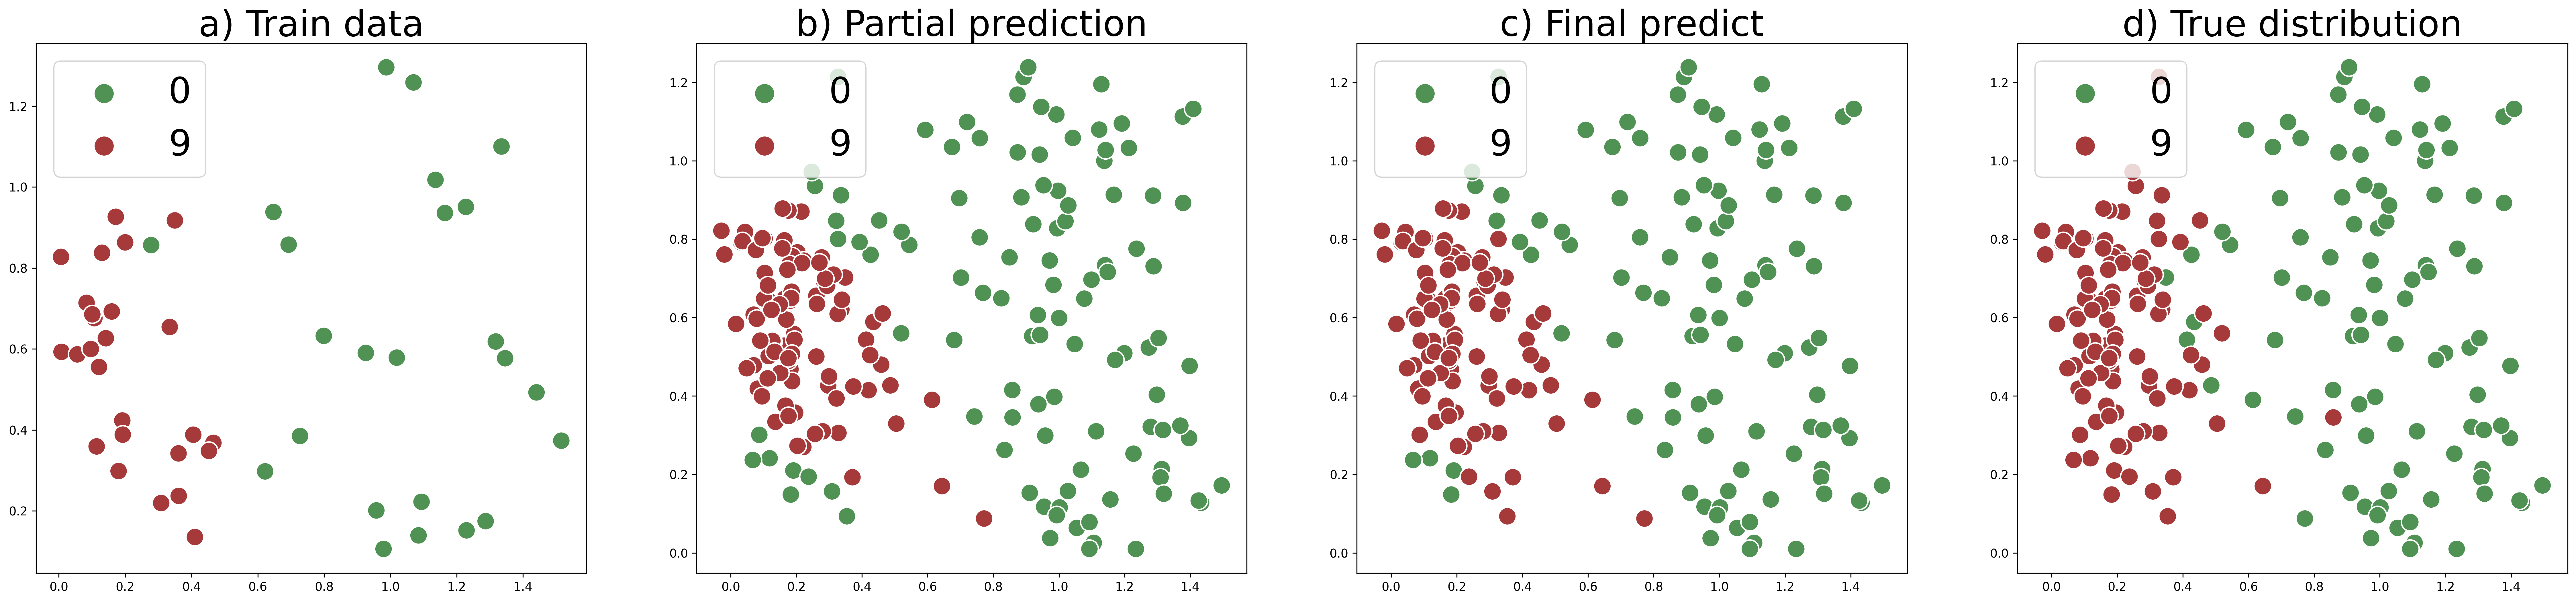

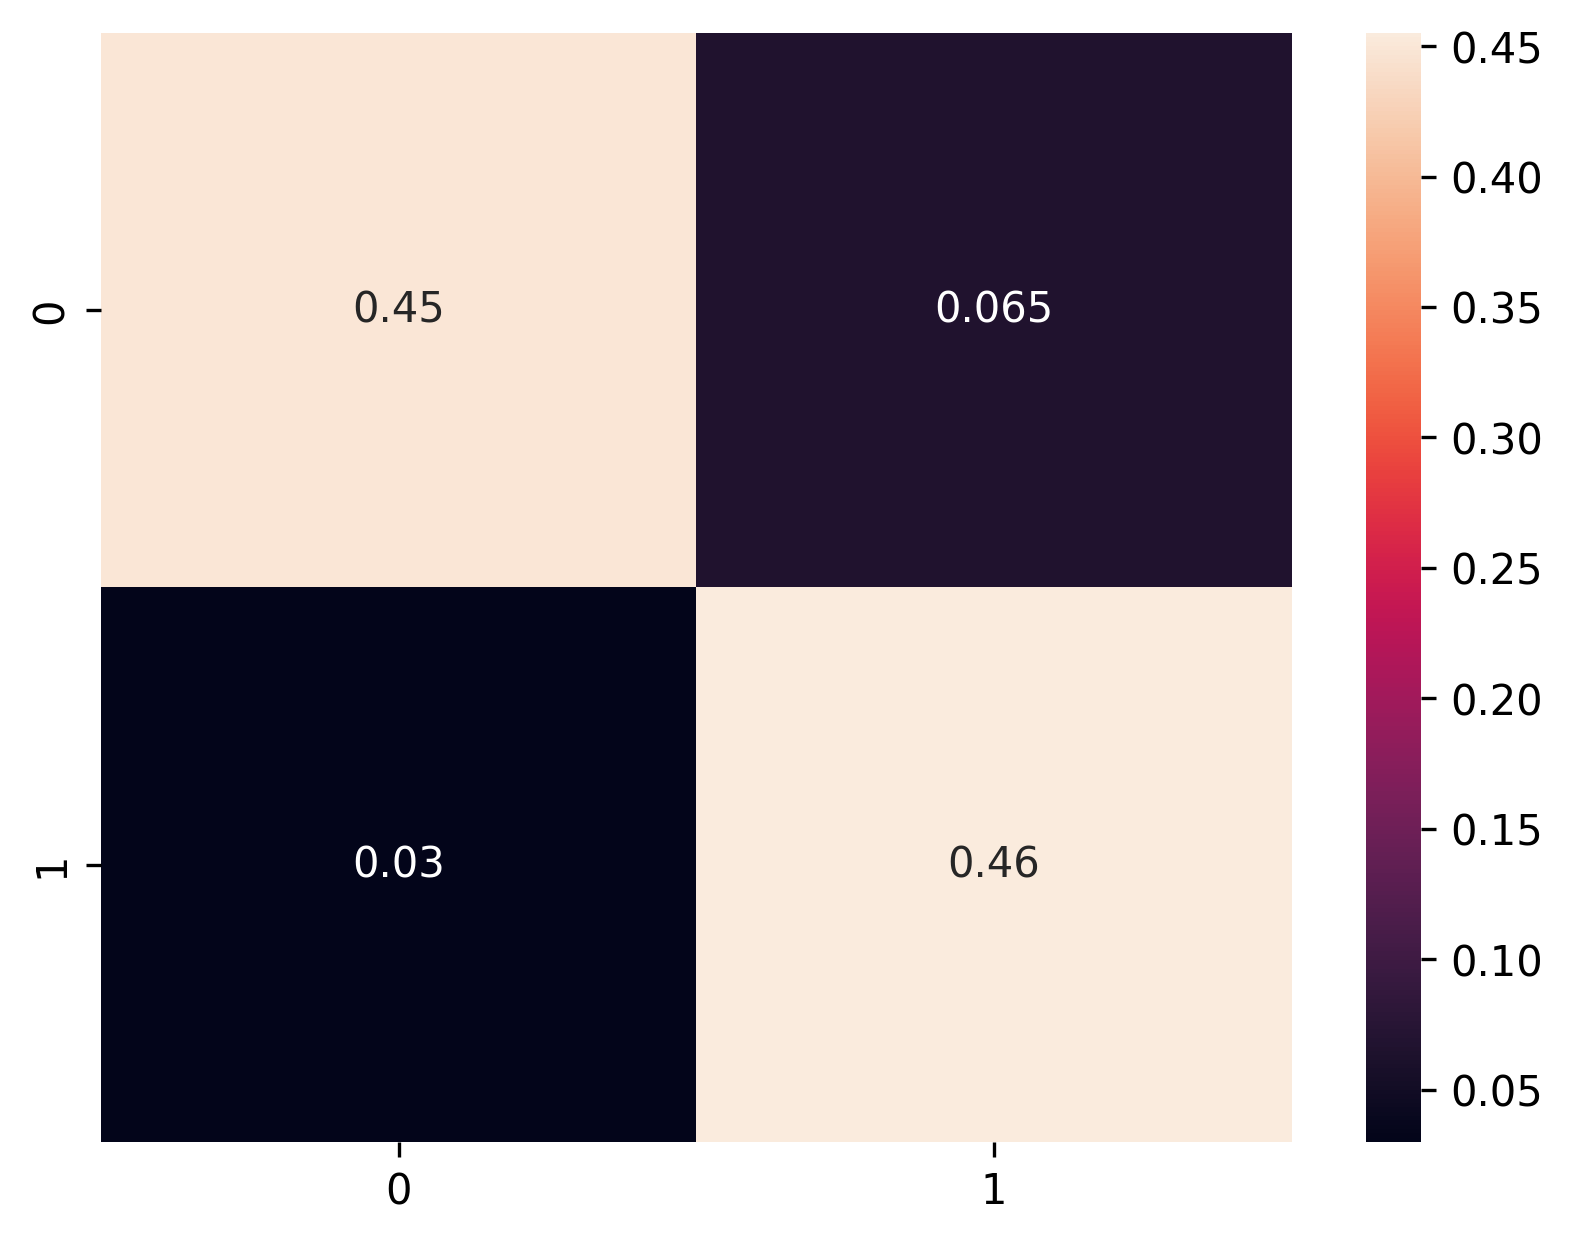

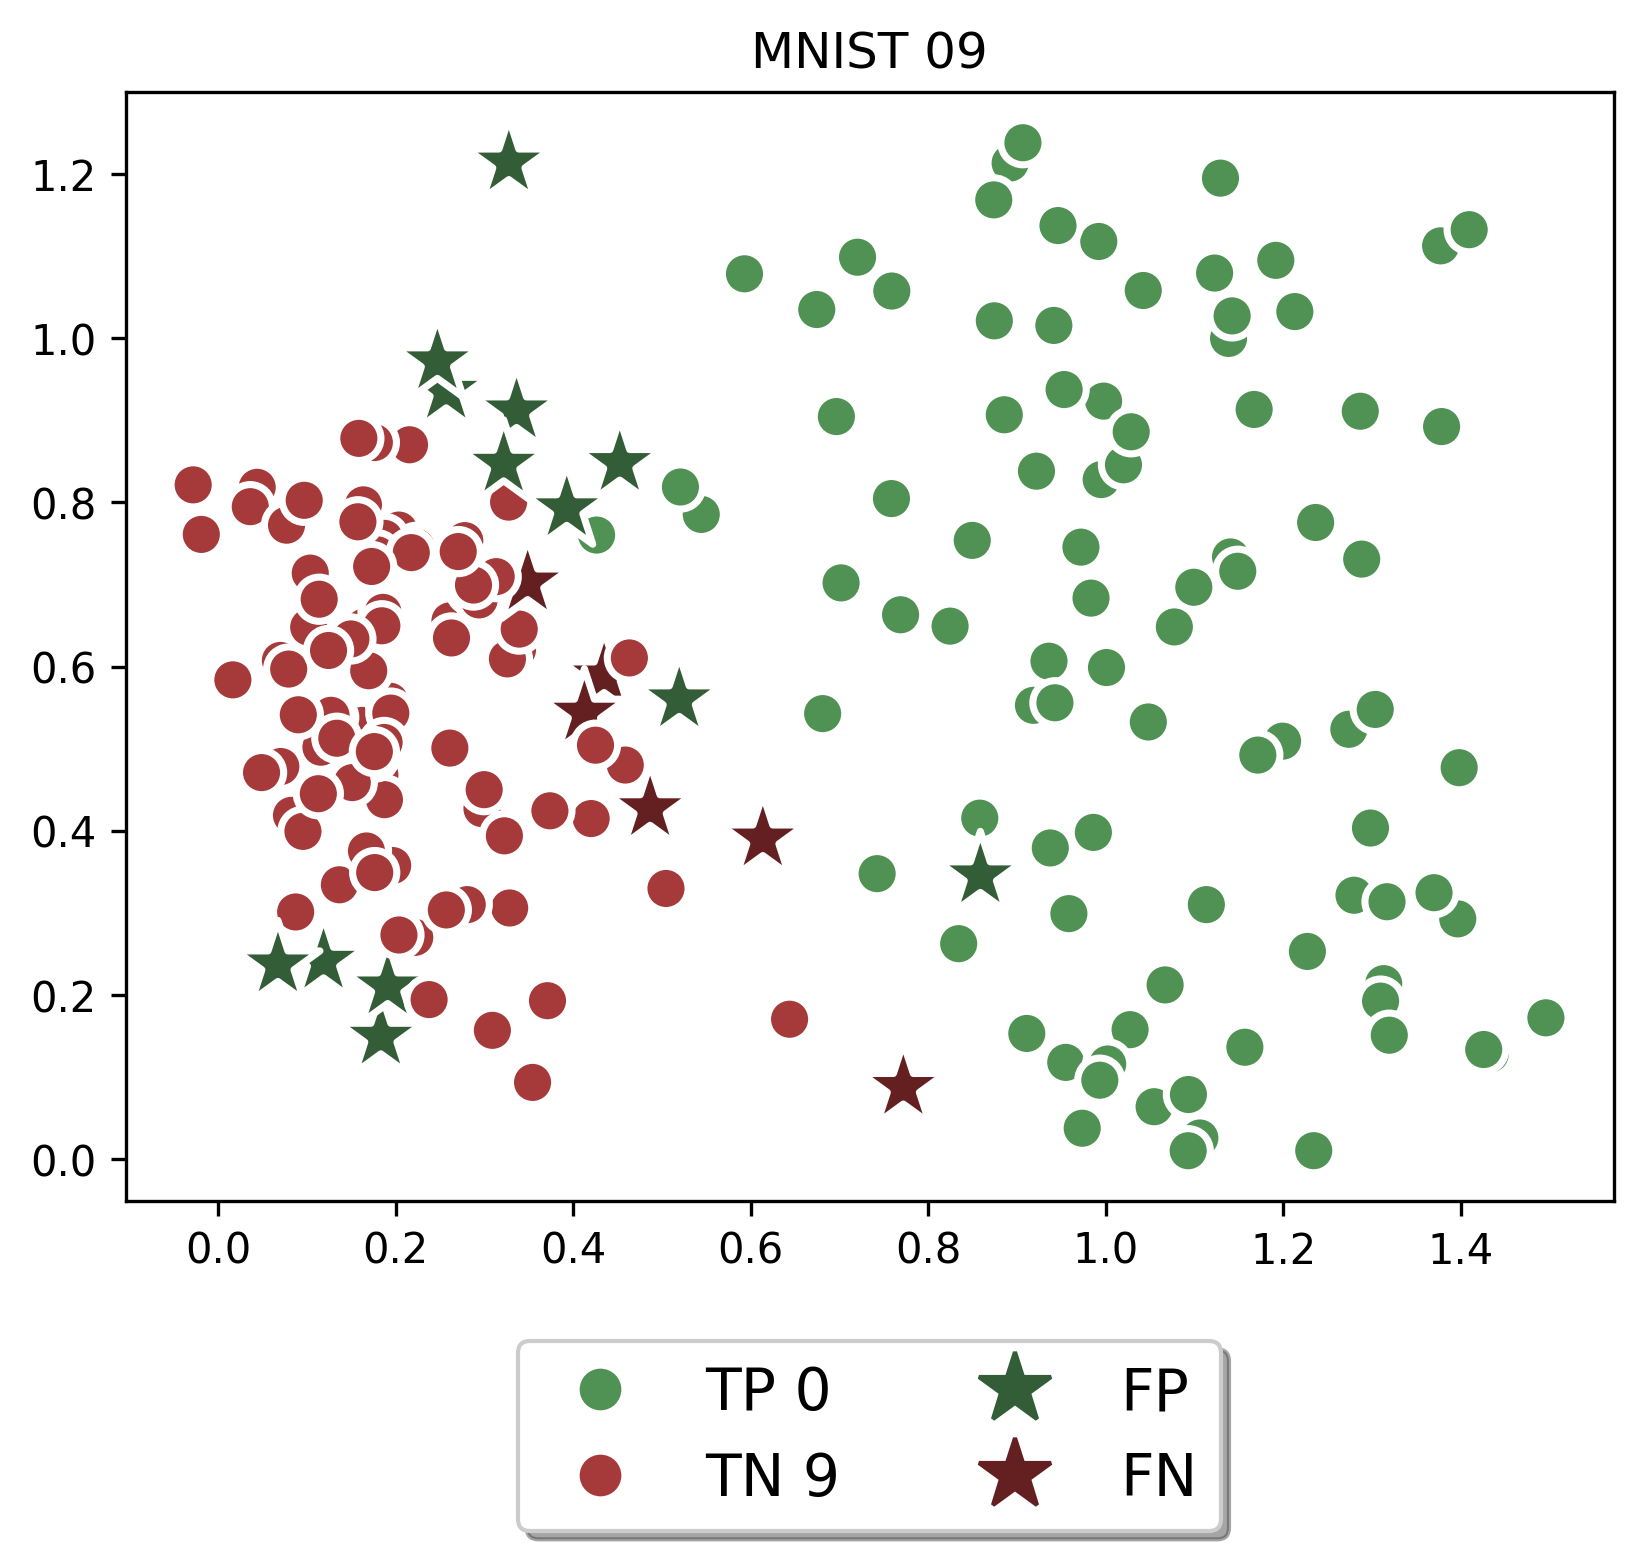

The best hyperparameters are:
B = 2 K = 3 xi = 1 gamma = 2
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	-20.0000	  0.8800	  0.9710	  0.9674	  0.8280	  0.9294	  0.9277
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST09_runMNIST09calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_couplers=11175_0


<Figure size 1920x1440 with 0 Axes>

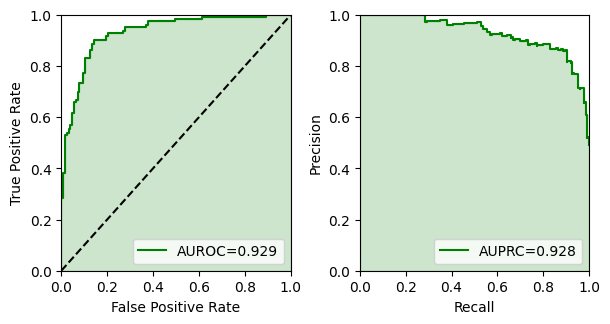

loading dataset MNIST with classes '3' and '8'
21.0% of total variance is explained by 2 principal components
MNIST38


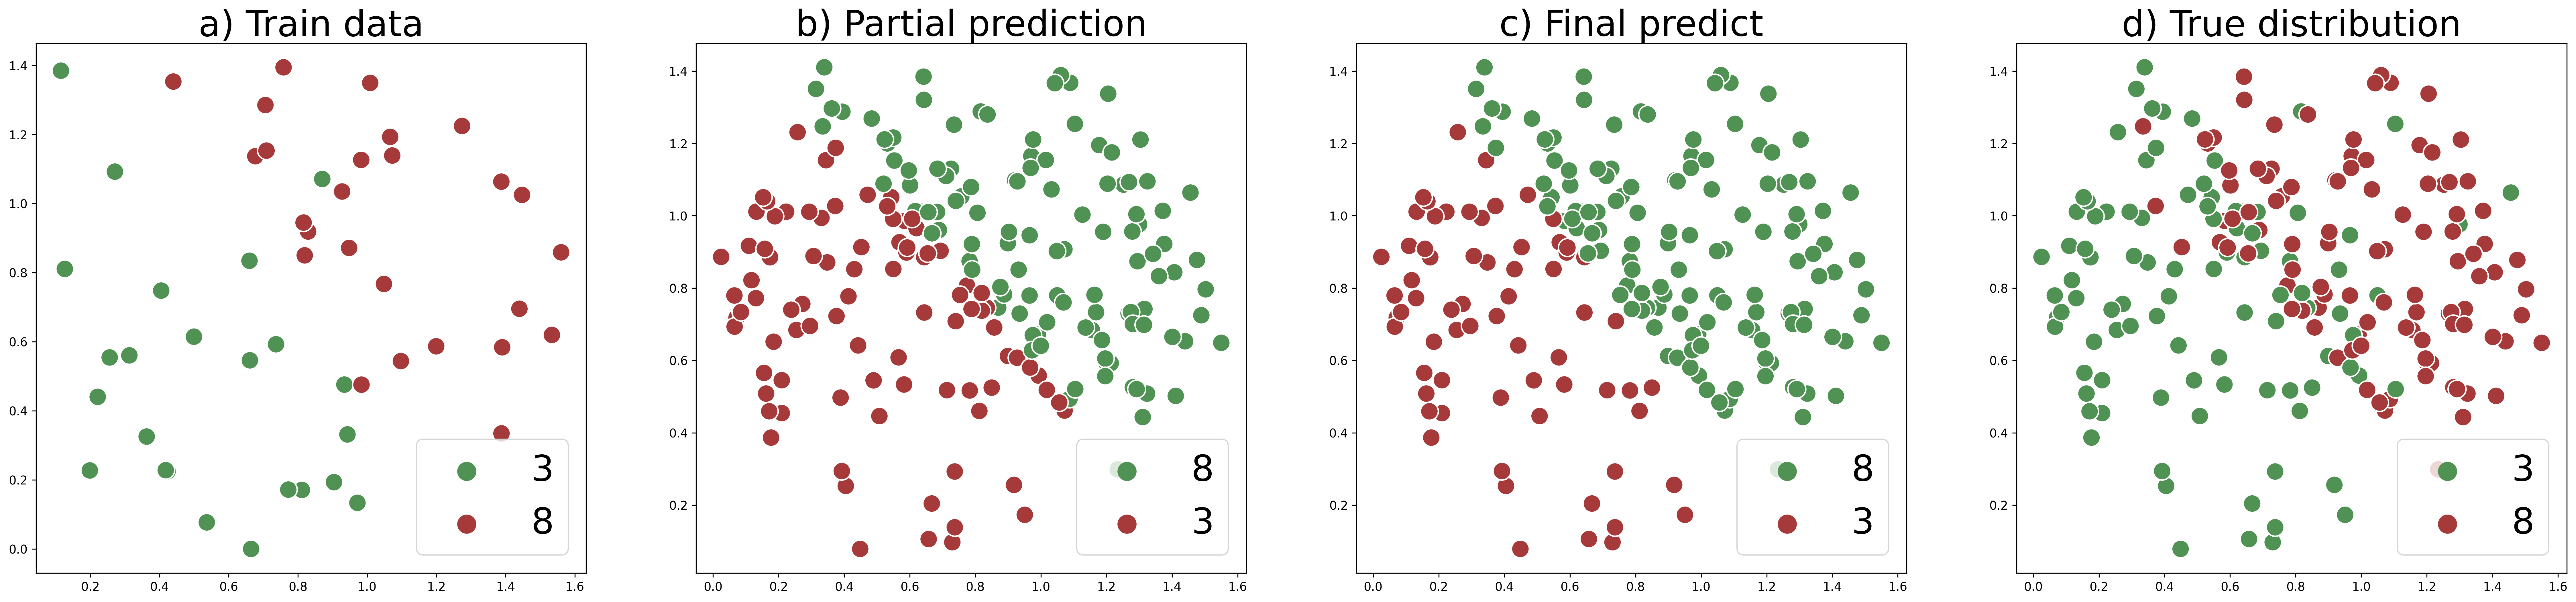

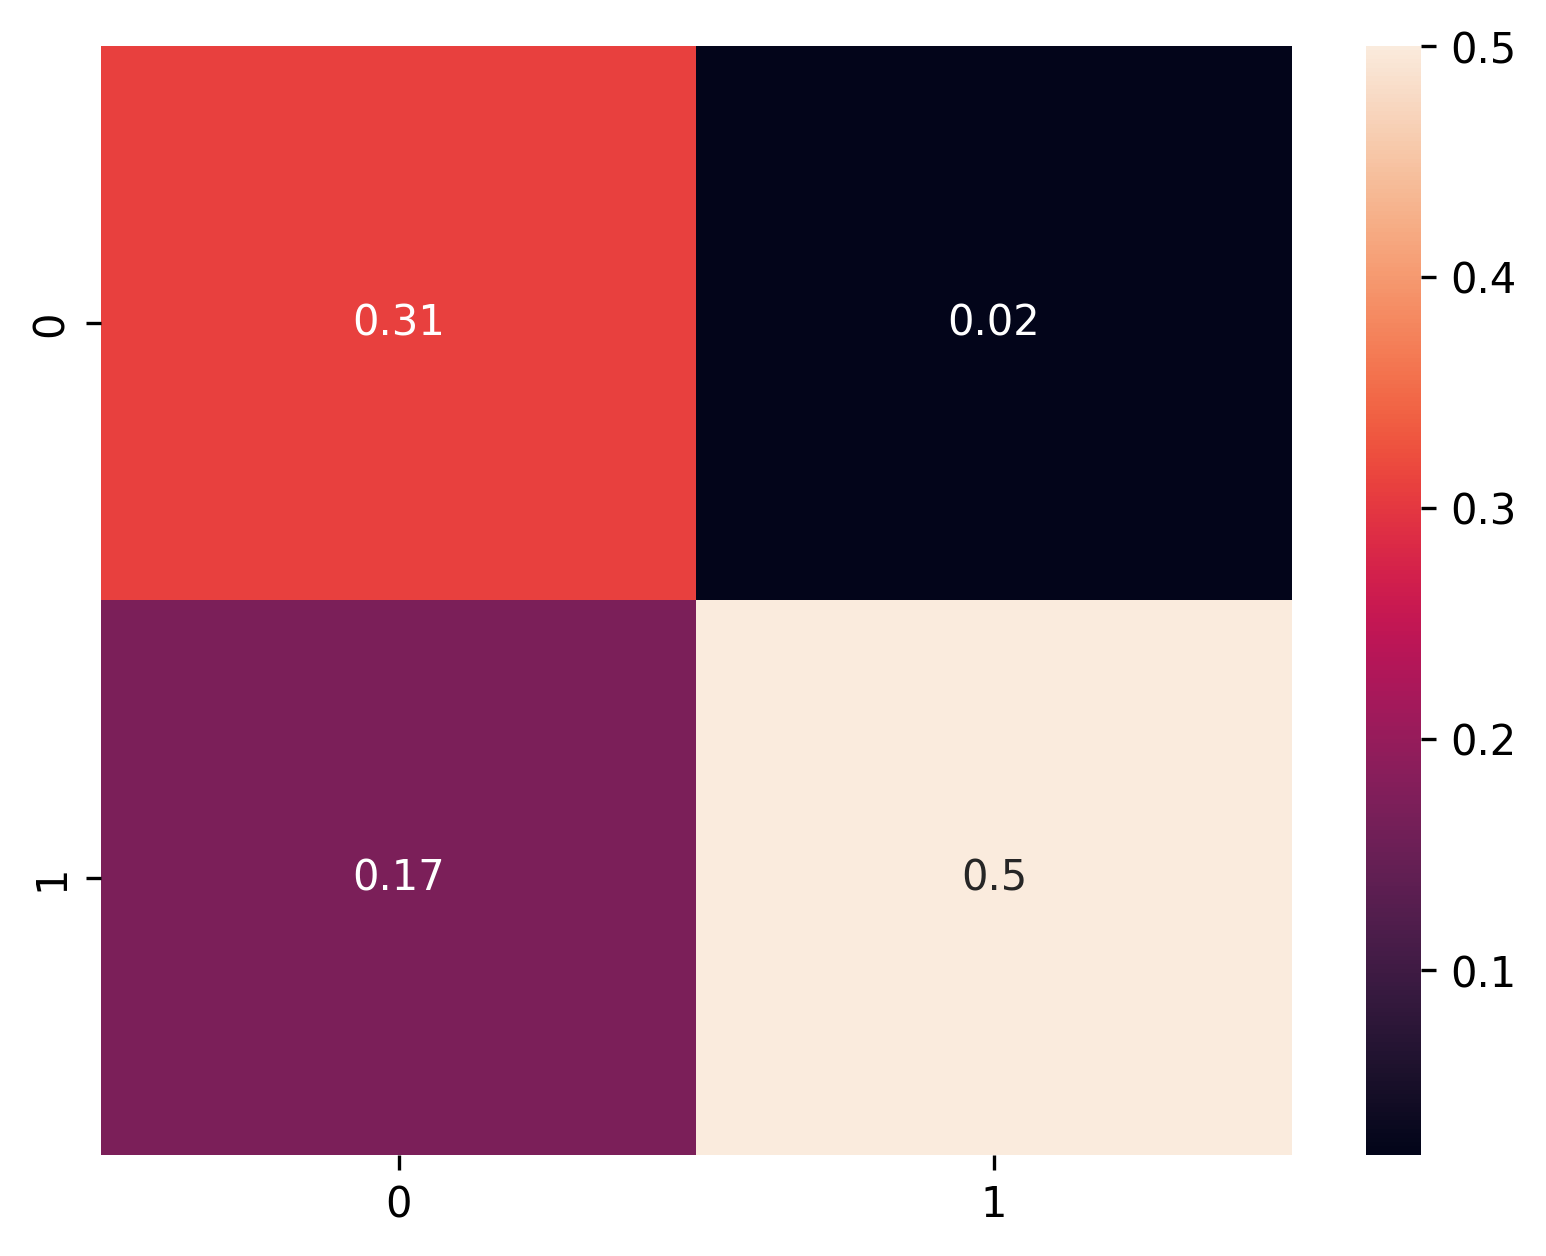

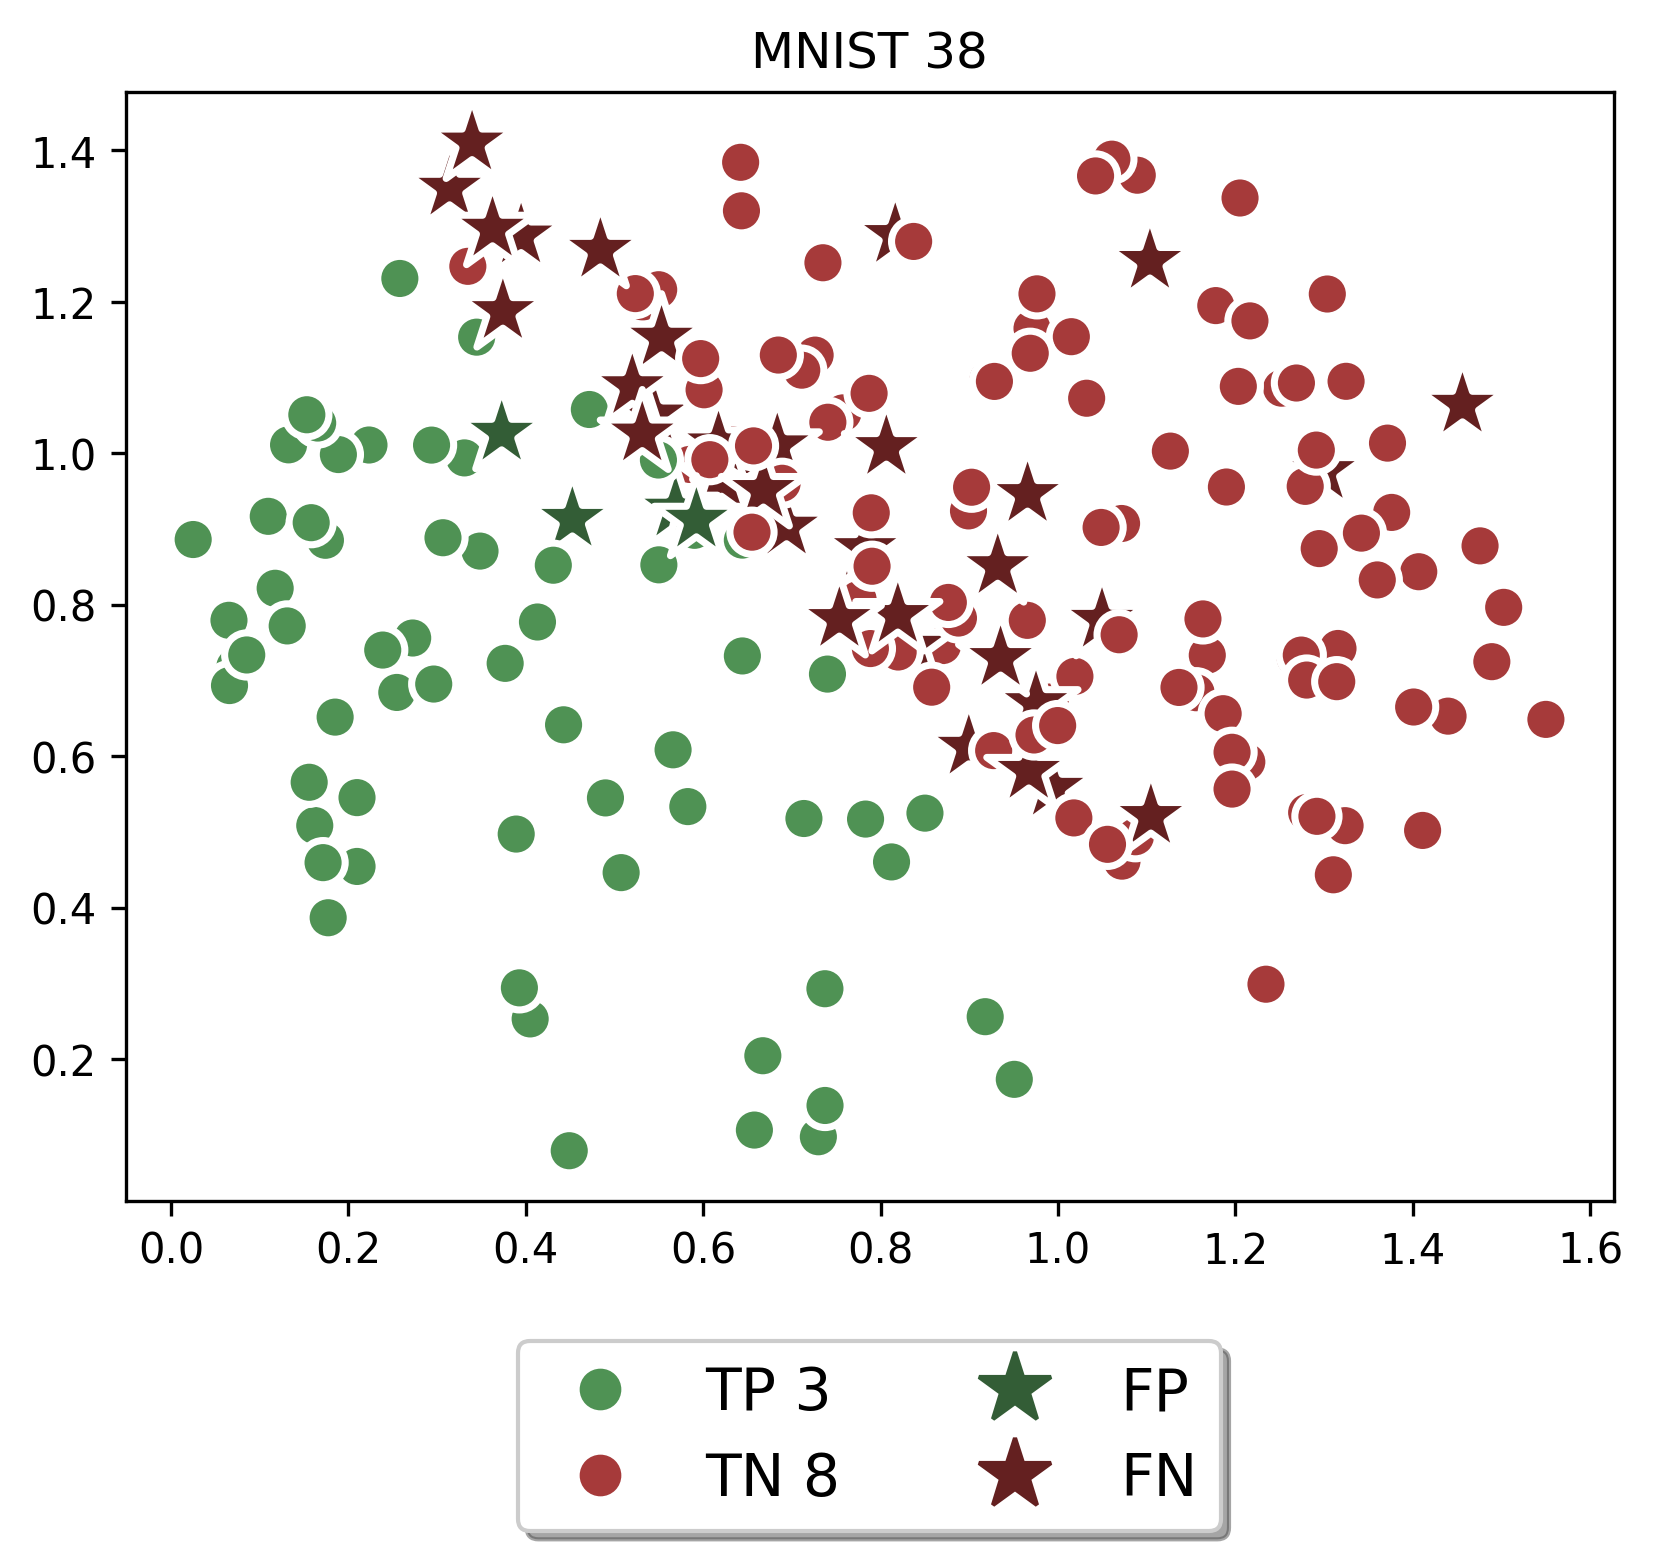

The best hyperparameters are:
B = 2 K = 3 xi = 1 gamma = 2
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	 17.0000	  0.8000	  0.8792	  0.8318	  0.8440	  0.9219	  0.8596
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST38_runMNIST38calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_couplers=11175_0


<Figure size 1920x1440 with 0 Axes>

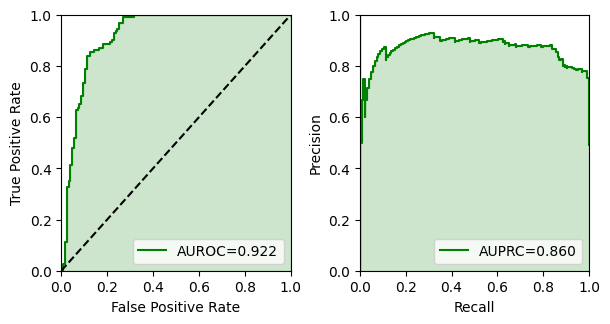

loading dataset MNIST with classes '4' and '7'
23.1% of total variance is explained by 2 principal components
MNIST47


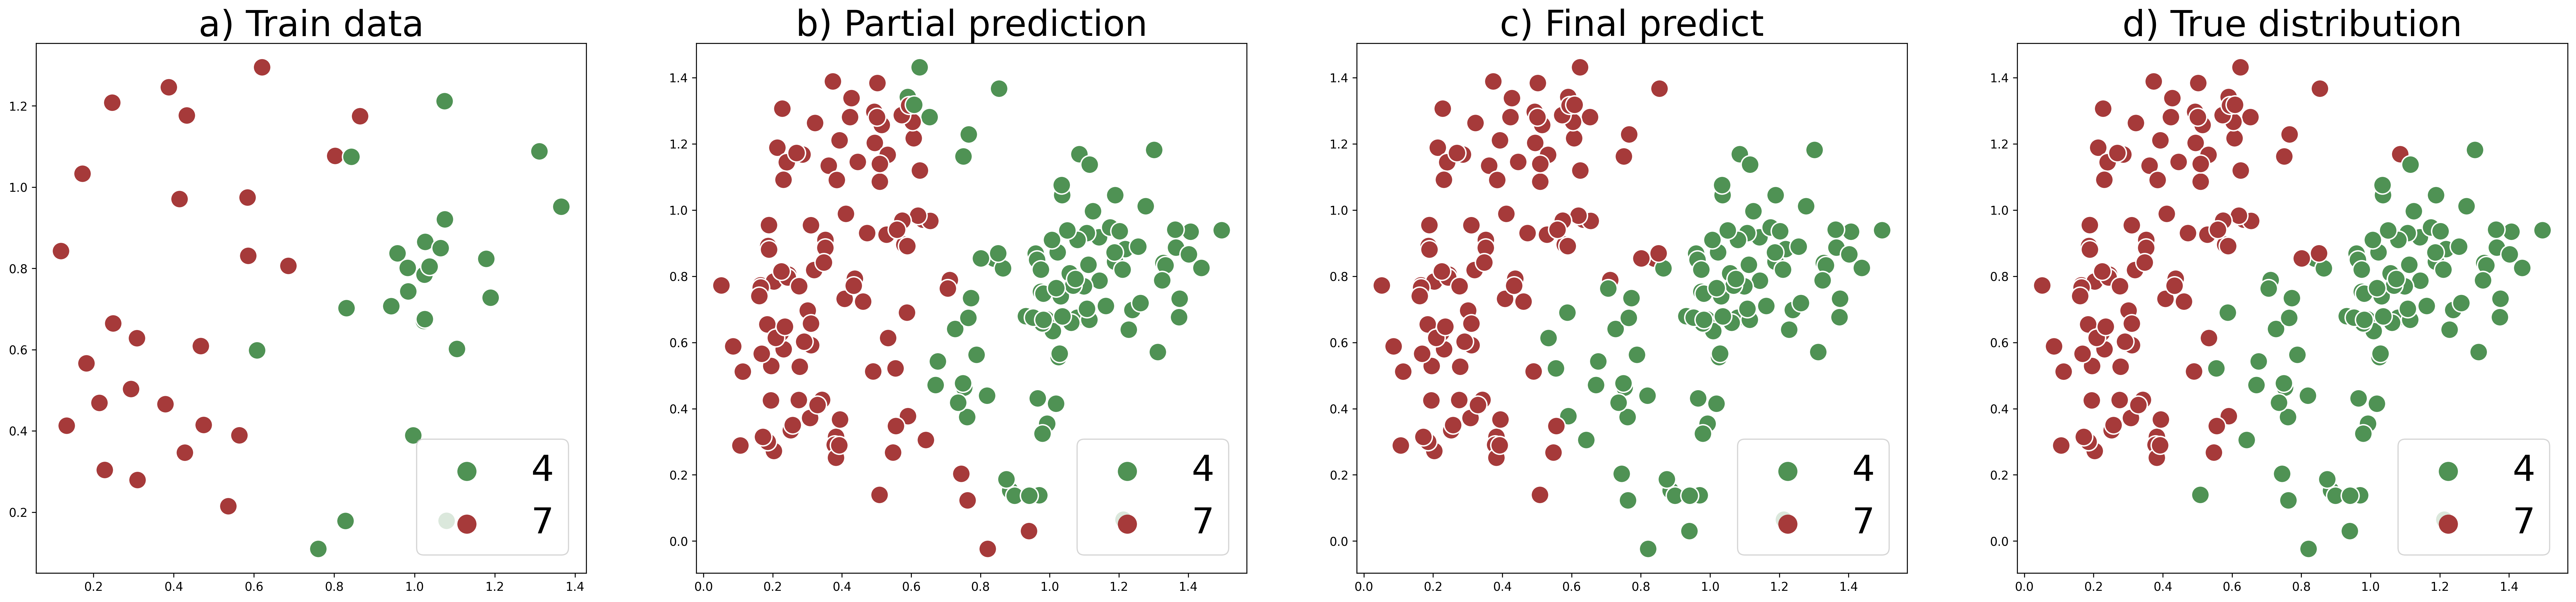

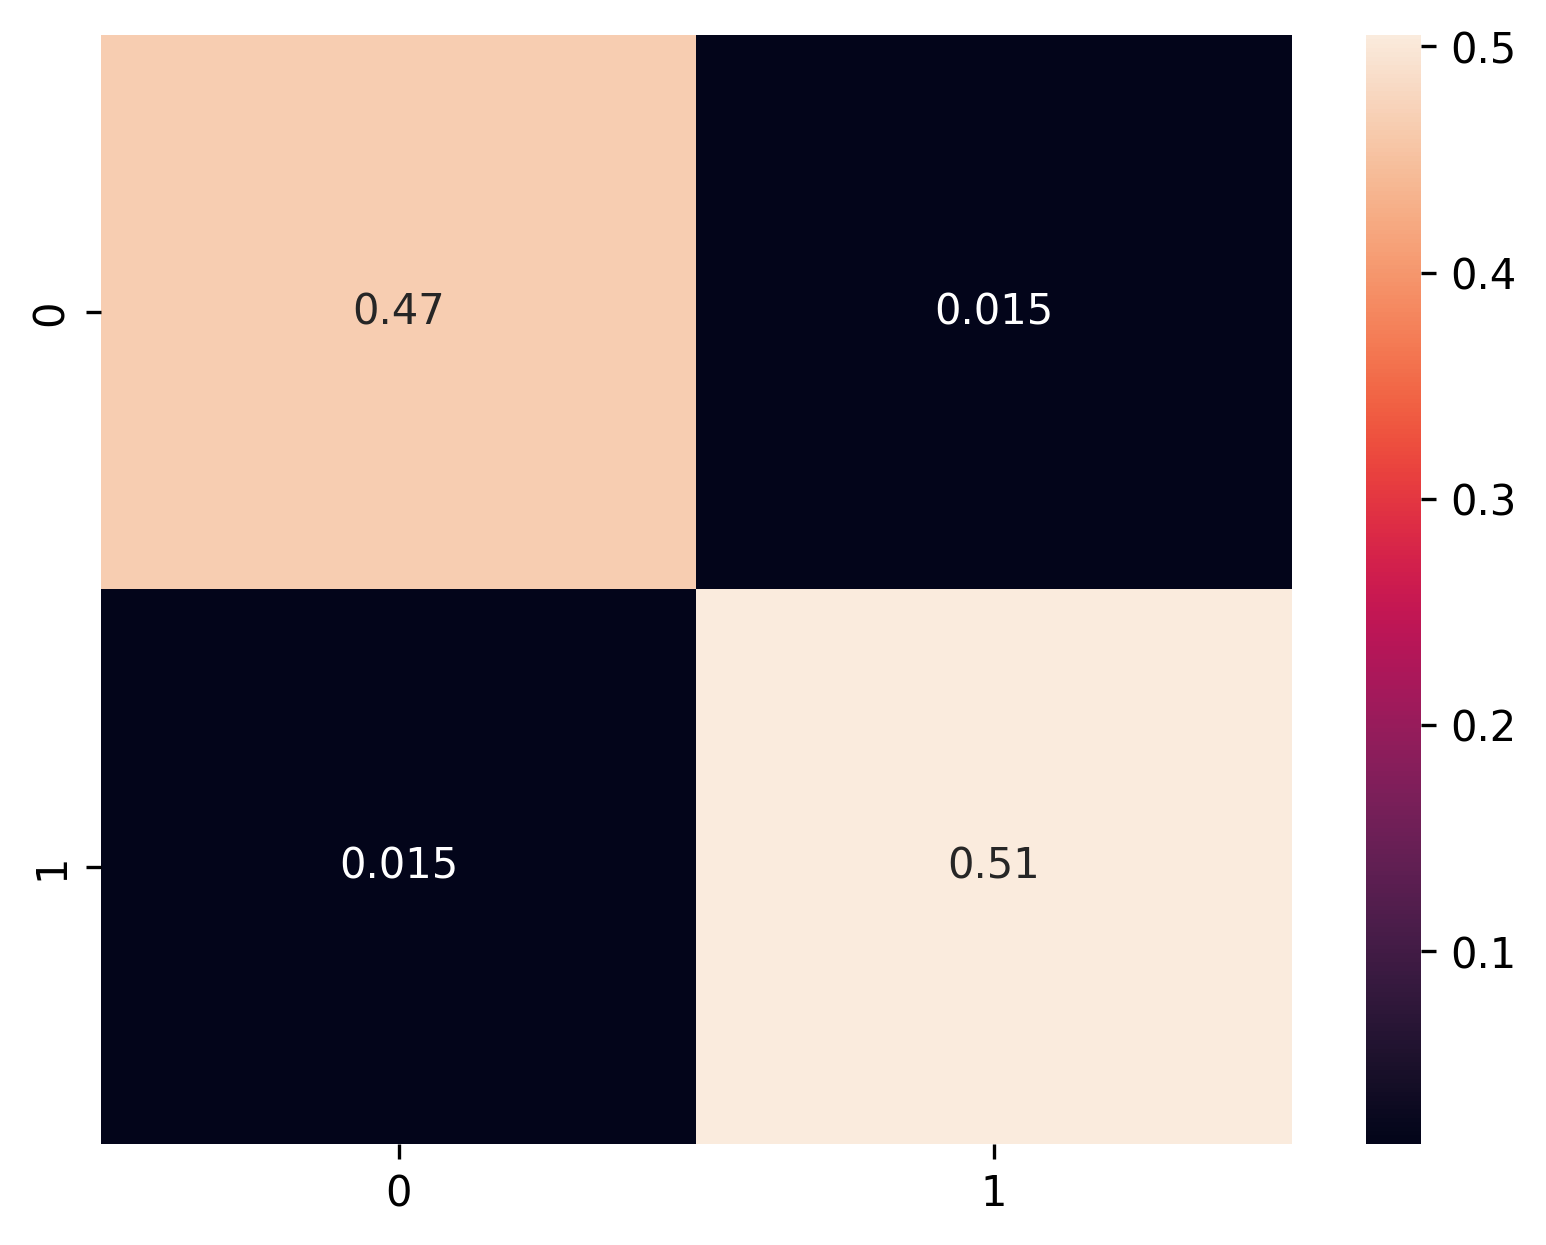

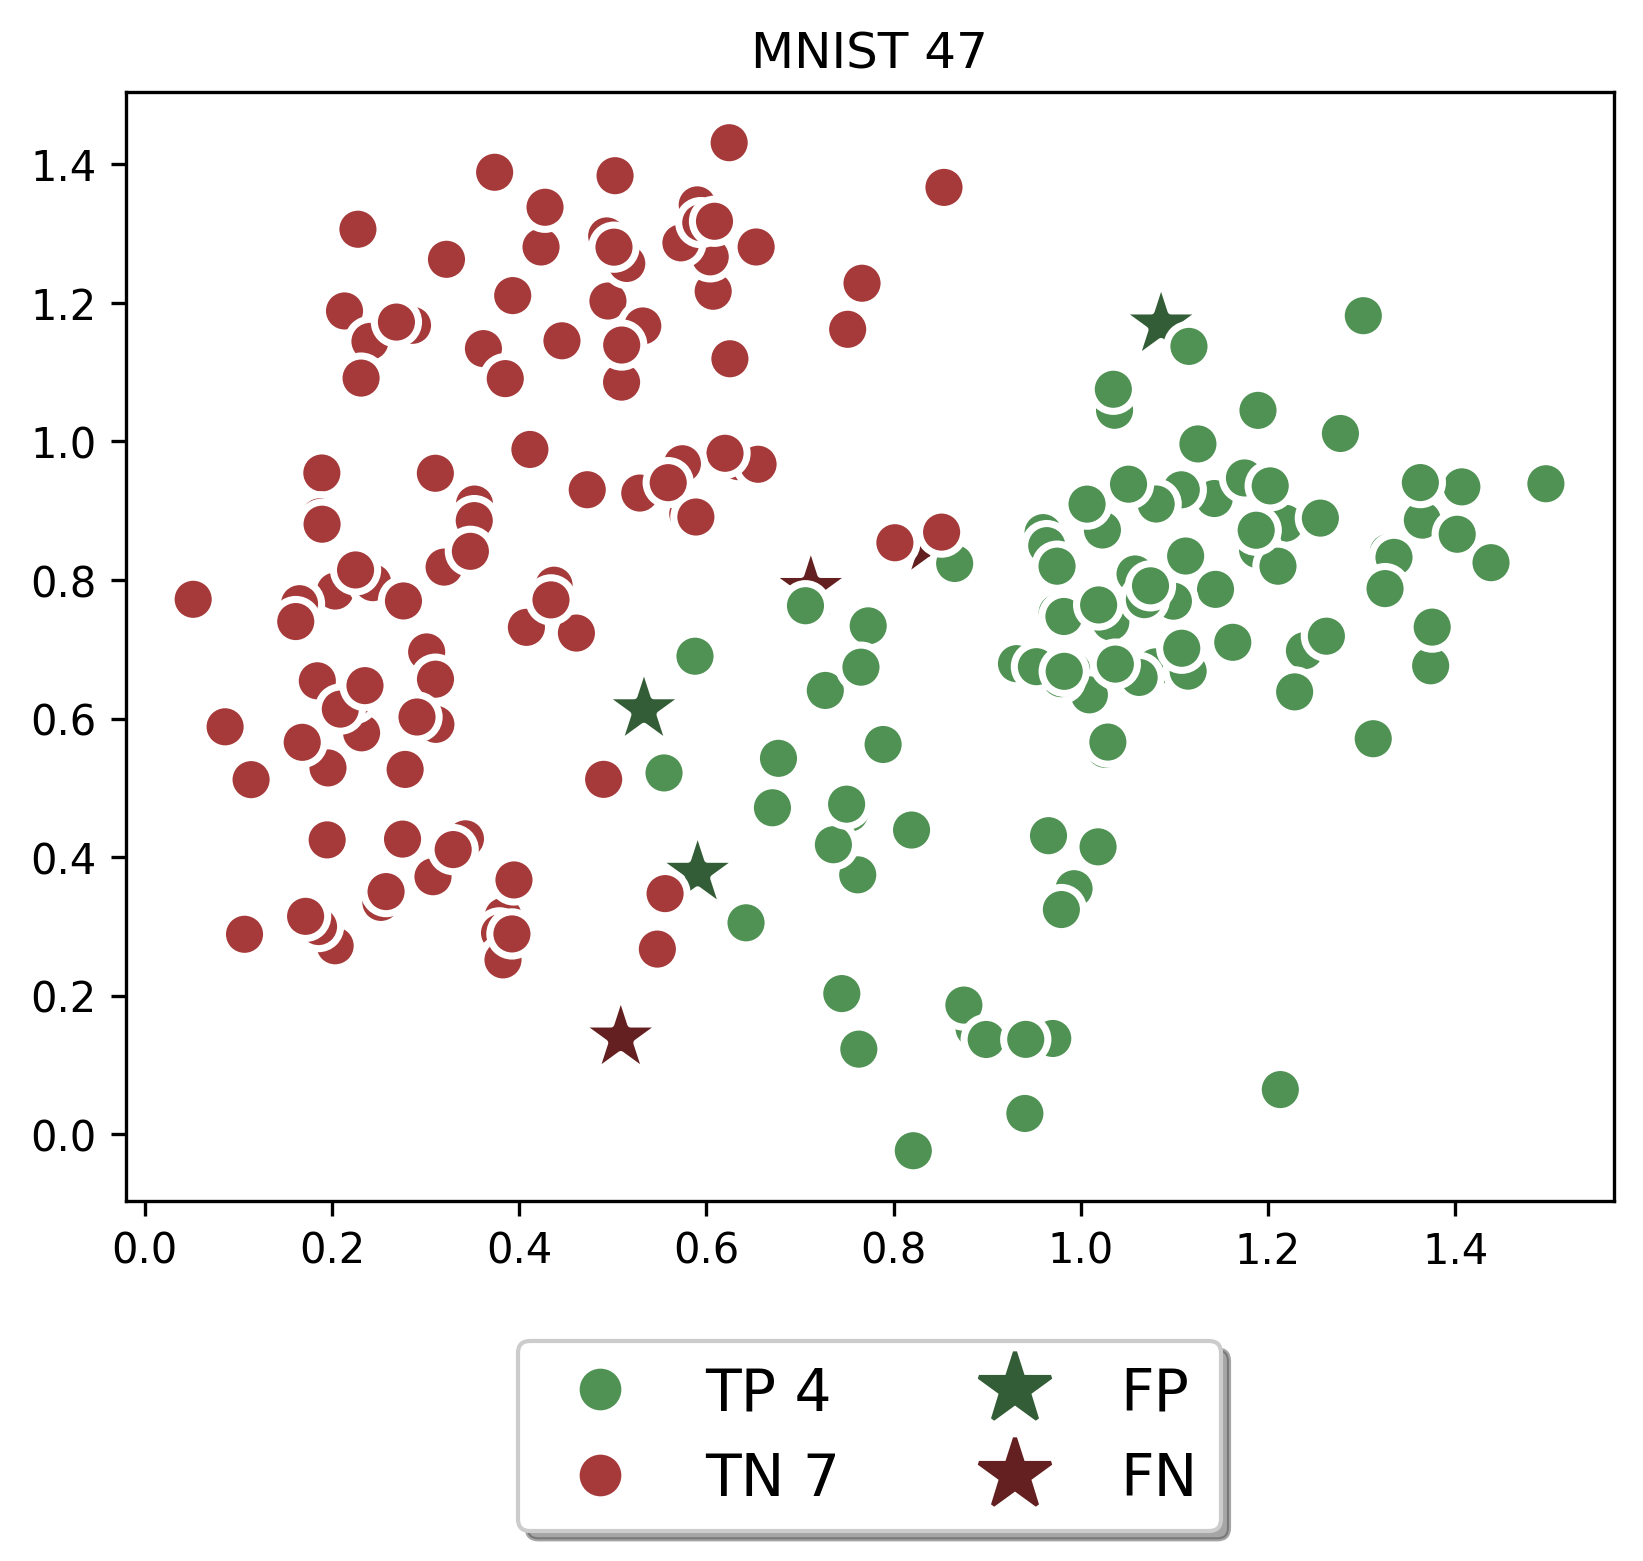

The best hyperparameters are:
B = 2 K = 3 xi = 1 gamma = 2
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	  9.0000	  0.9800	  0.9871	  0.9886	  0.9560	  0.9801	  0.9821
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST47_runMNIST47calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_couplers=11175_0


<Figure size 1920x1440 with 0 Axes>

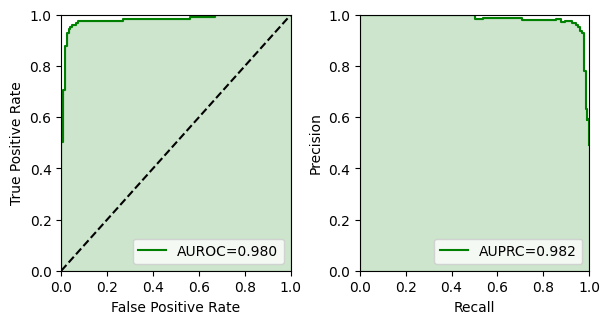

loading dataset MNIST with classes '5' and '6'
25.4% of total variance is explained by 2 principal components
MNIST56


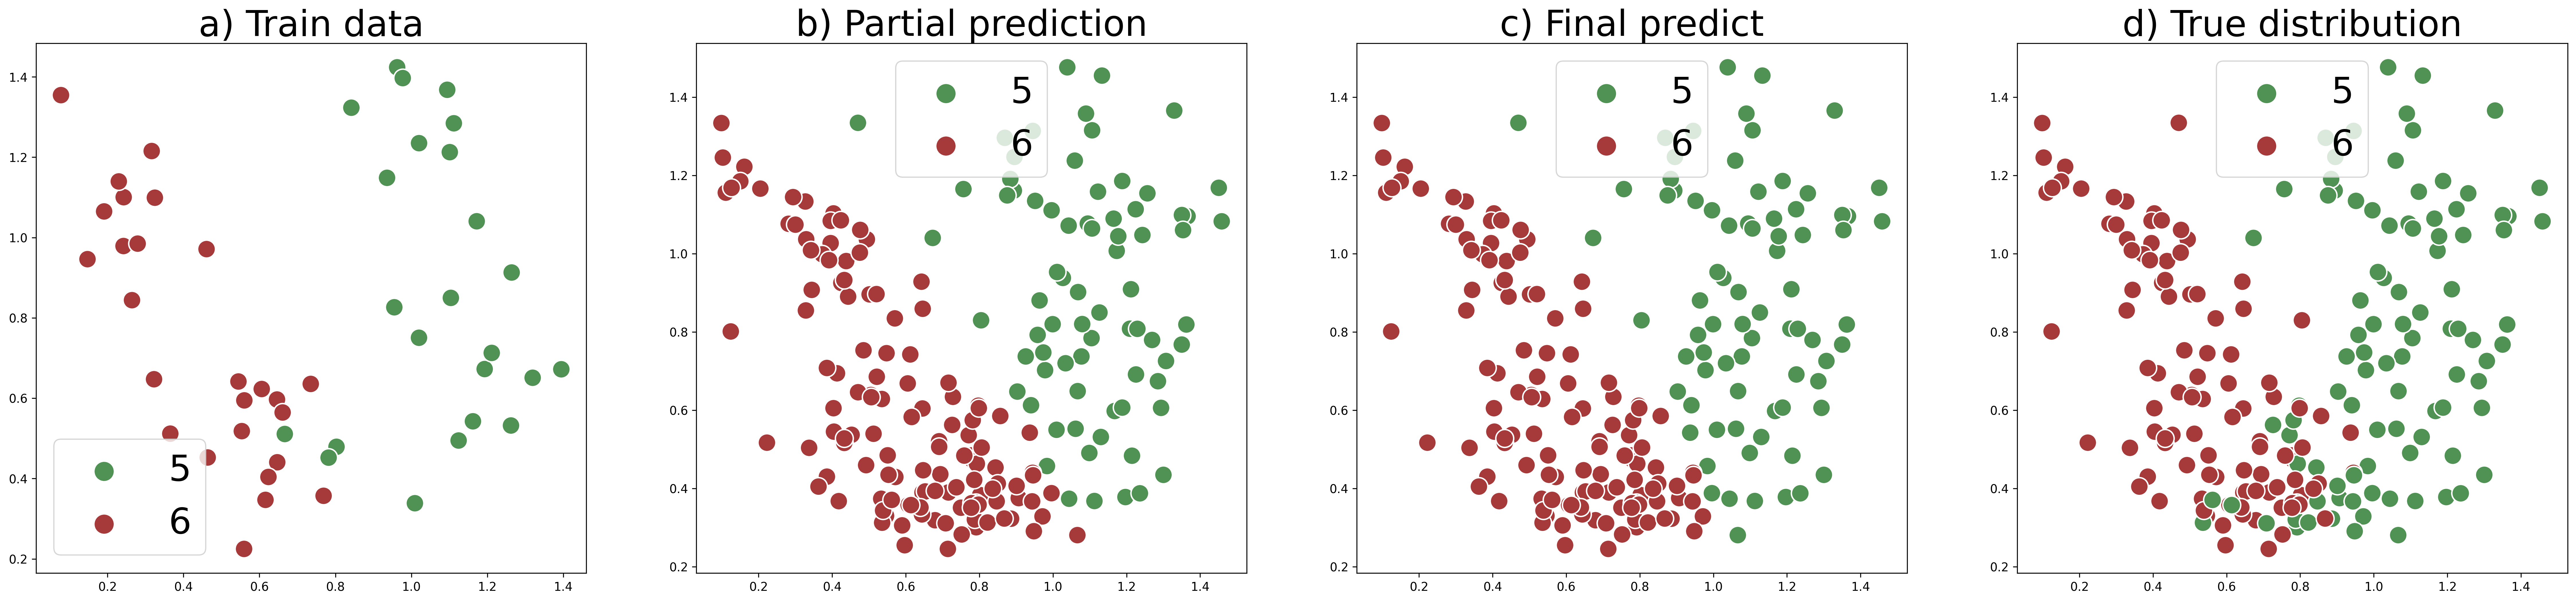

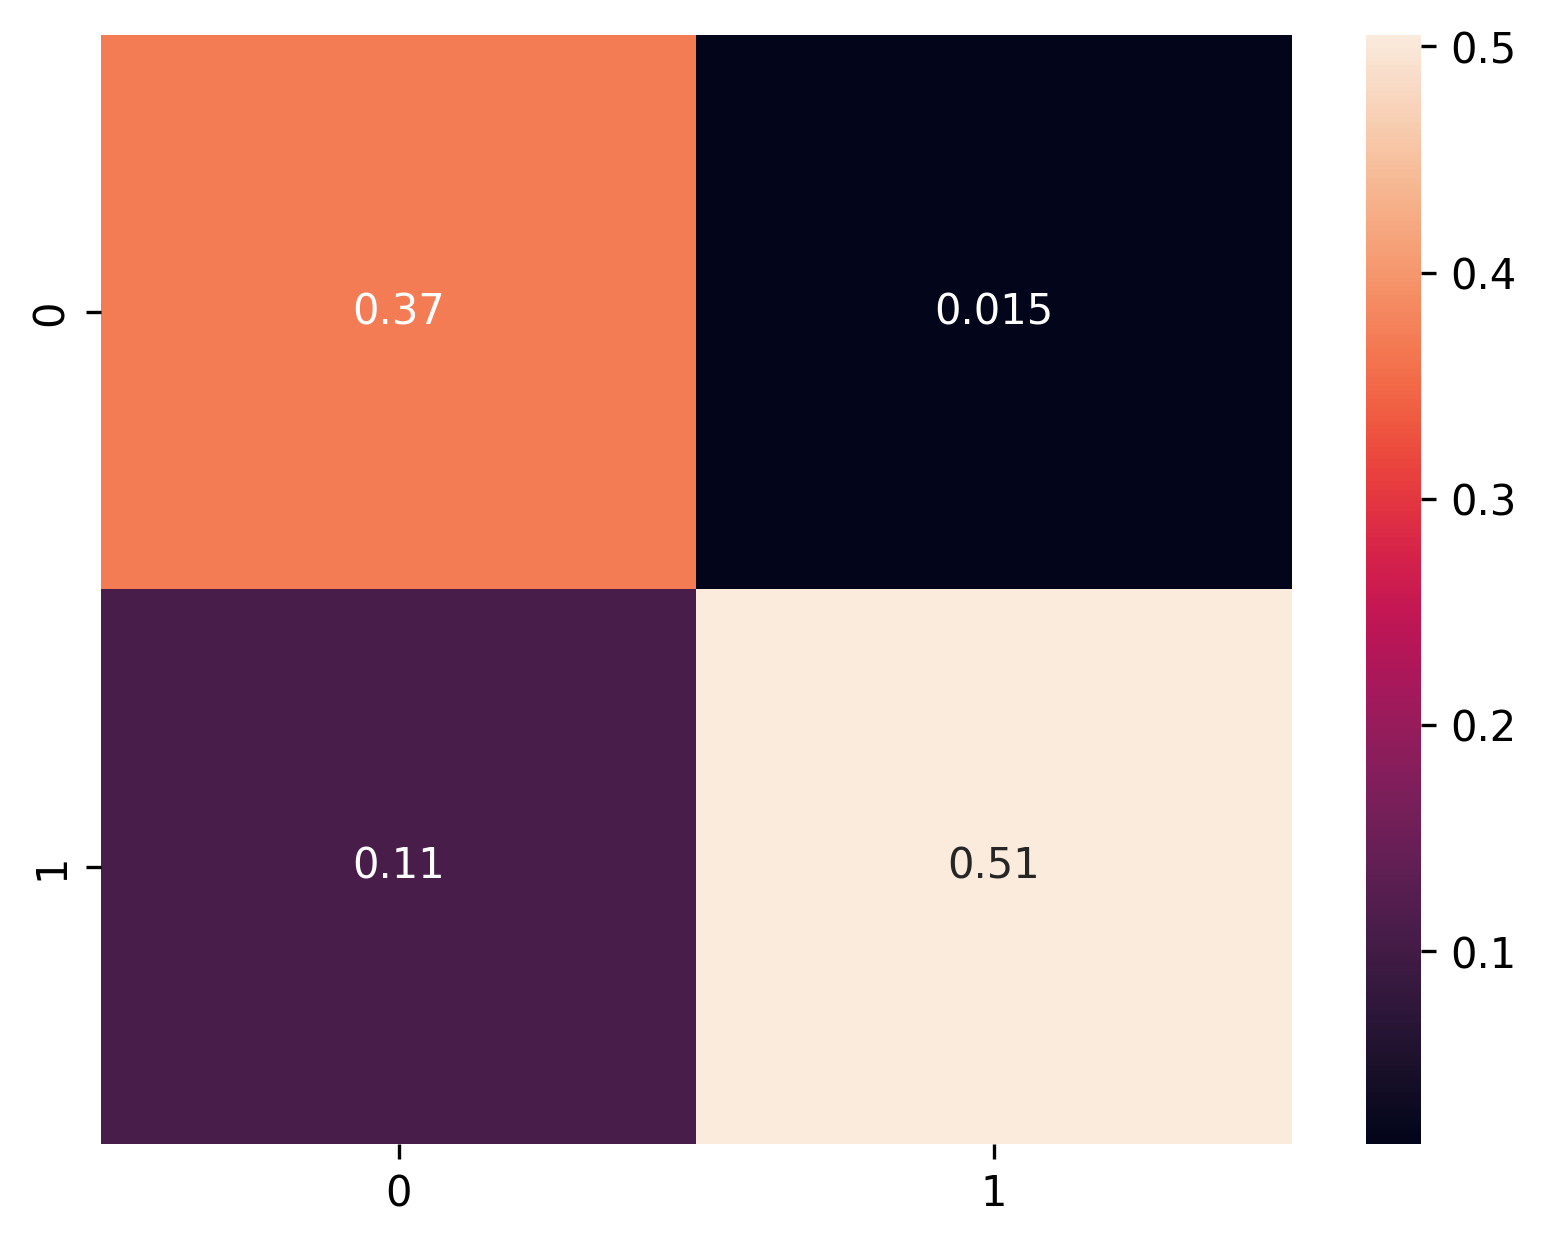

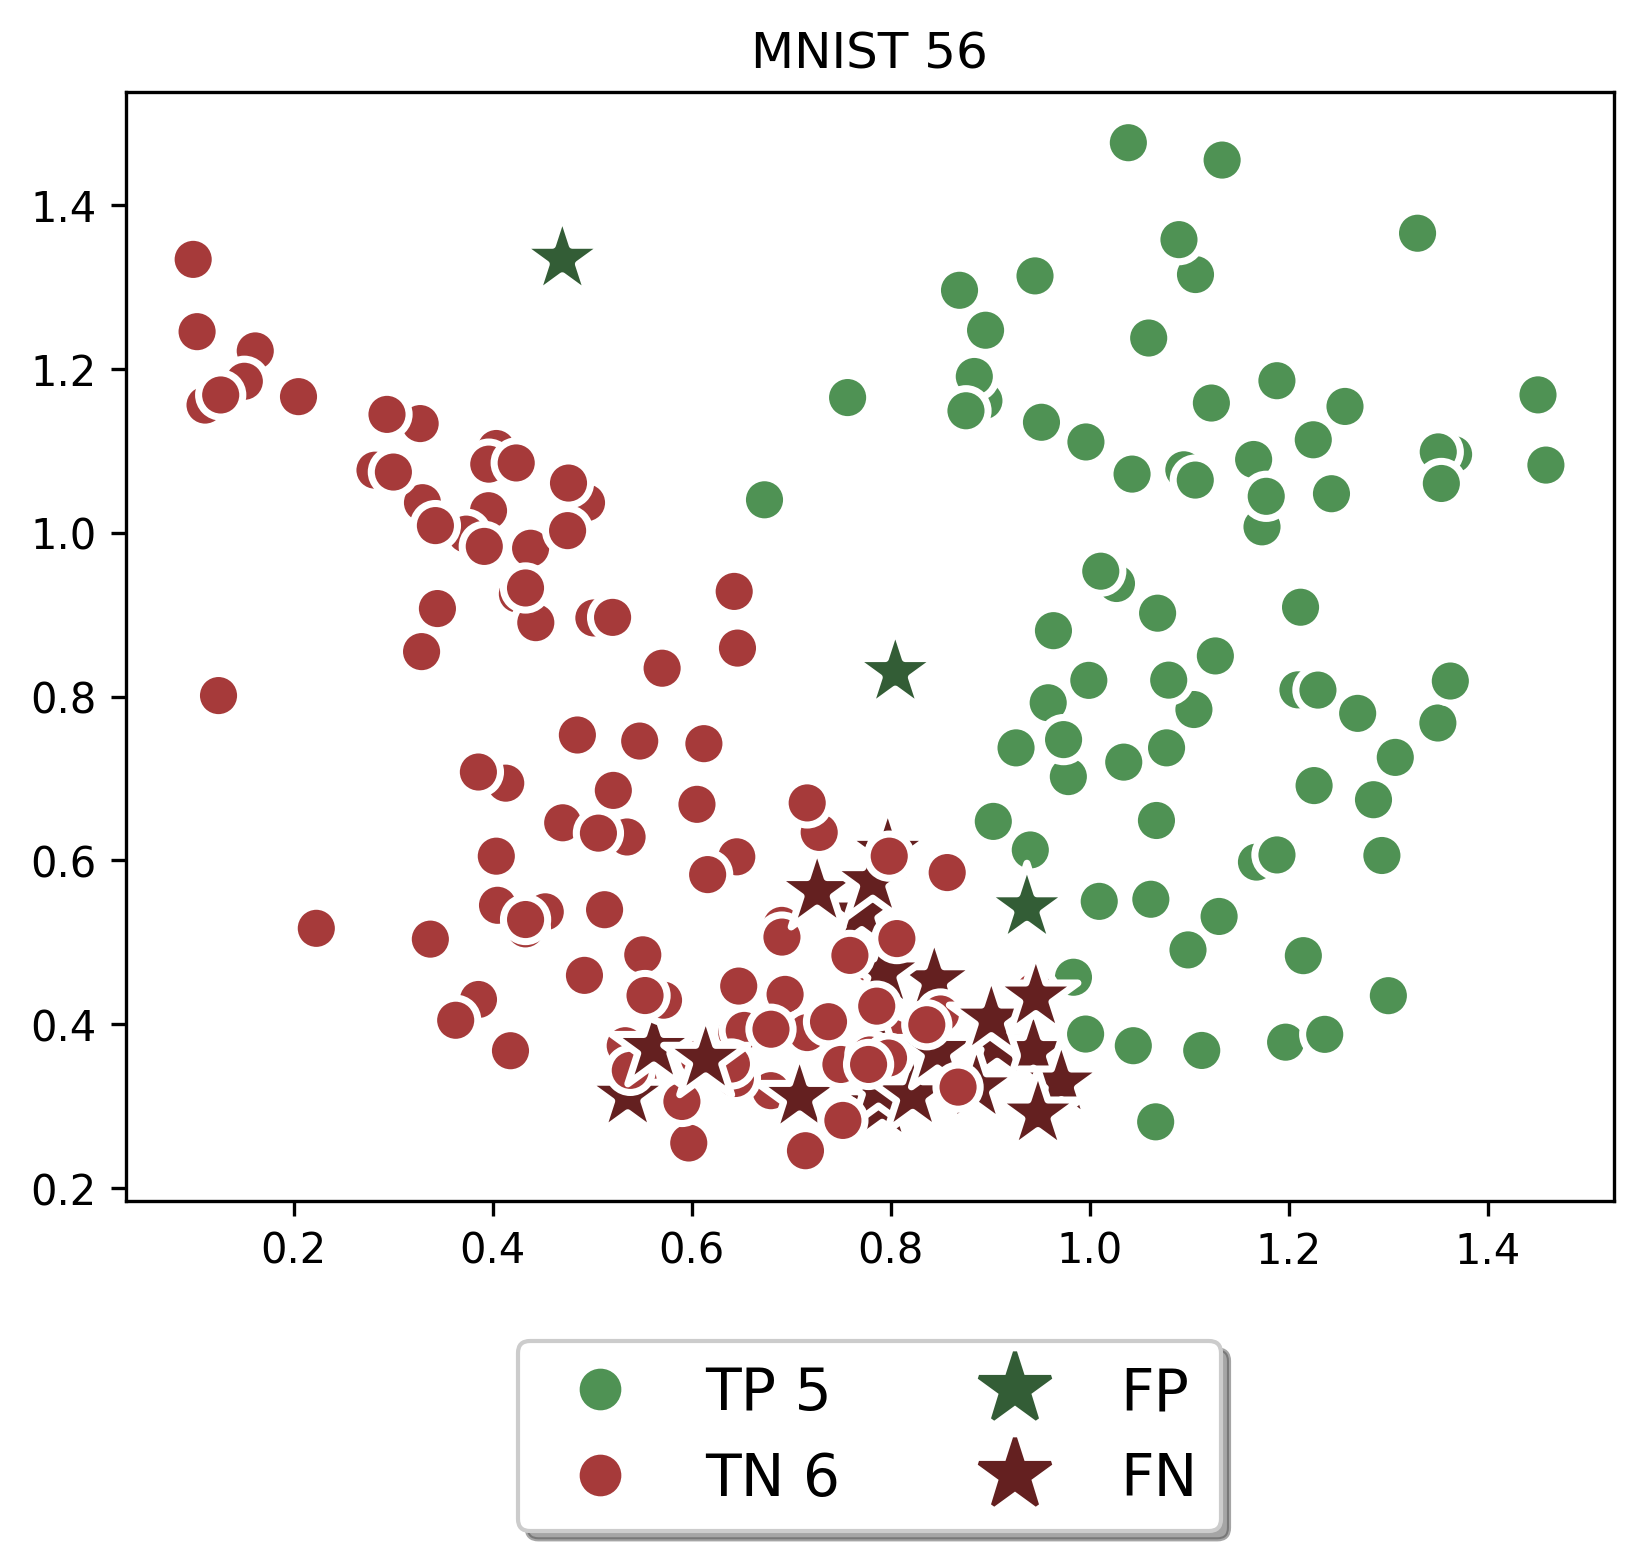

The best hyperparameters are:
B = 2 K = 2 xi = 2 gamma = 2
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	 -2.0000	  0.8800	  0.9712	  0.9722	  0.8960	  0.9439	  0.9342
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST56_runMNIST56calibtrain0_1_B=2_K=2_xi=2_gamma=2.0_result_couplers=4950_0


<Figure size 1920x1440 with 0 Axes>

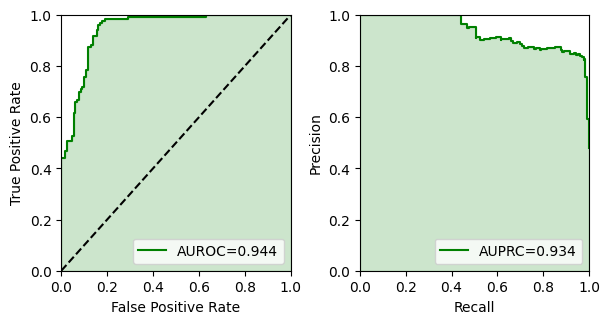

In [3]:
from utils import * # It contains functions for threat the data (I/O, encoding/decoding) and metrics for evaluations 
from quantum_SVM import *
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def loaddd(datakey):
    dataset = np.loadtxt(datakey, dtype=float, skiprows=1)
    return dataset[:,2:], dataset[:,1]  # data, labels
palette2 = ['#4F9254','#A63A3A']
sns.set_palette(palette2)

# Load the data
# in this instance gamma represents the number of features in the dataset
gamma=2
dfl = ['MNIST09','MNIST38','MNIST47','MNIST56',]
palette3 = ['#4F9254','#A63A3A','#335D36', '#642020']
import matplotlib.lines as mlines
# fig, axes = plt.subplots(1, 1, figsize= (8,8), dpi=100)
colors = '#4F9254'
colorl = '#A63A3A'
white = '#FFFFFF'
id_dataset='MNIST09'

for id_dataset in dfl:
    [X_train,X_test, Y_train, Y_test ]=load(id_dataset, gamma)
    c0 = id_dataset[-2]
    c1 = id_dataset[-1]
    print(id_dataset)


    path_data_key='input_datasets/train/'+id_dataset+'/'
    data_key = id_dataset+'calibtrain'
    path_train_out='outputs/train/'+id_dataset+'/'
    path_test_out='outputs/test/'+id_dataset+'/'

    path_files=np.load(path_train_out+'trained_SVMs.npy')
        
    experiments=4
    slices=6
    scores=[]

    a = list(map(list, zip(*X_test)))


    for j in range(0,experiments):
        for i in range(0,slices):
            scores.append(predict(path_data_key,path_files[i],X_test))

    avg_scores=np.zeros((scores[0].shape[0]))
    Y_predicted=np.zeros((scores[0].shape[0]),int)

    for i in range(0,scores[0].shape[0]):
        tmp=0
        for y in range(0,slices):
            tmp=tmp+scores[y][i]
        avg_scores[i]=tmp/slices   
    

    for i in range(0,scores[0].shape[0]):
        if(avg_scores[i]<0):
            Y_predicted[i]=-1.0
        else:
            Y_predicted[i]=1.0

    #DRAW 4
    path = f"input_datasets/train/{id_dataset}/{id_dataset}calibtrain{0}_{0}"
    traion_data, train_labels = loaddd(path)
    b = list(map(list, zip(*traion_data)))

    fig, axes = plt.subplots(1, 4, figsize= (38,8), dpi=300)
    axes[0].set_title('a) Train data'          ,fontsize=30,)
    axes[1].set_title('b) Partial prediction'  ,fontsize=30,)
    axes[2].set_title('c) Final predict'       ,fontsize=30,)
    axes[3].set_title('d) True distribution'   ,fontsize=30,)

    sns.scatterplot(x = b[0],y = b[1], hue=[c1 if a > 0 else c0 for a in train_labels],   ax=axes[0], palette=palette2, s= 225)#, style=Y_predicted)
    sns.scatterplot(x = a[0],y = a[1], hue=[c1 if a > 0 else c0 for a in scores[0]],      ax=axes[1] ,palette=palette2, s= 225)#, style=Y_predicted)
    sns.scatterplot(x = a[0],y = a[1], hue=[c1 if a > 0 else c0 for a in Y_predicted],    ax=axes[2], palette=palette2, s= 225)#, style=Y_predicted)
    sns.scatterplot(x = a[0],y = a[1], hue=[c1 if a > 0 else c0 for a in Y_test],         ax=axes[3], palette=palette2, s= 225)#, style=Y_predicted)
    for ax in axes :
        lgnd = ax.legend(fontsize=30,)
        lgnd.legendHandles[0]._sizes = [225]
        lgnd.legendHandles[1]._sizes = [225]

    plt.show()

    #PRINT cofusion
    plt.figure(dpi=300)
    sns.heatmap(confusion_matrix(Y_predicted, Y_test)/len(Y_predicted),annot=True)
    accuracy_score(Y_predicted, Y_test)
    plt.show()
    plt.figure(dpi=300)

    #PRINT 1 PLOT
    kuku=sns.scatterplot(x = a[0],y = a[1], hue=Y_predicted + 4*(Y_predicted != Y_test),s=450, markers=['.','*'], palette=palette3, style=Y_predicted != Y_test, legend=None)
    kuku.set(title=f'MNIST {c0}{c1}')
    handles =     [mlines.Line2D([], [], color=white, marker='.',linewidth=5,markersize=18, label=f'TP {c0}', markerfacecolor=palette3[0], markeredgecolor=palette3[0])]
    handles.append(mlines.Line2D([], [], color=white, marker='.',linewidth=5,markersize=18, label=f'TN {c1}', markerfacecolor=palette3[1], markeredgecolor=palette3[1]))
    handles.append(mlines.Line2D([], [], color=white, marker='*',linewidth=5,markersize=18, label='FP', markerfacecolor=palette3[2], markeredgecolor=palette3[2]))
    handles.append(mlines.Line2D([], [], color=white, marker='*',linewidth=5,markersize=18, label='FN', markerfacecolor=palette3[3], markeredgecolor=palette3[3]))
    kuku.legend(handles = handles,loc='upper center',bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=2, fontsize = 14)
    plt.show()
    
    plt.figure(dpi=300)

    #PRINT AUROC
    # Get the calibration results
    path_out='outputs/calibration/'+id_dataset+'/'
    hyperparameters=np.load(path_out+'hyperparameters.npy')
    testauprc_all=np.load(path_out+'testauprc_all.npy')
    # # Select the best hyperparameter set for the max value of testauprc
    idx_max = np.where(testauprc_all == np.amax(testauprc_all))
    B=int(hyperparameters[int(idx_max[0]),0])
    K=int(hyperparameters[int(idx_max[0]),1])
    xi=int(hyperparameters[int(idx_max[0]),2])
    print('The best hyperparameters are:\n'+'B = '+str(B)+' K = '+str(K)+' xi = '+str(xi)+' gamma = '+str(gamma))

    homepath = '/home/fi_ippo/Desktop/prova 2 qsvm/tmp/mine/'
    path_data_key='input_datasets/train/'+id_dataset+'/'
    puyh=homepath + f'outputs/train/{id_dataset}/run{id_dataset}calibtrain0_{int(idx_max[0])}_B={B}_K={K}_xi={xi}_gamma=2.0/'
    wuwu = [i[0] for i in os.walk(puyh)][1]
    eval_run_rocpr_curves(path_data_key,wuwu, 'ss')

In [90]:
from utils import * # It contains functions for threat the data (I/O, encoding/decoding) and metrics for evaluations 
# Load the data
# in this instance gamma represents the number of features in the dataset
gamma=2

id_dataset='MNIST09'
[X_train,X_test, Y_train, Y_test ]=load(id_dataset, gamma)

loading dataset MNIST with classes '0' and '9'
30.8% of total variance is explained by 2 principal components


In [91]:
from quantum_SVM import *
from sklearn import preprocessing

# Pre-processing the test spectra


path_data_key='input_datasets/train/'+id_dataset+'/'
data_key = id_dataset+'calibtrain'
path_train_out='outputs/train/'+id_dataset+'/'
path_test_out='outputs/test/'+id_dataset+'/'

path_files=np.load(path_train_out+'trained_SVMs.npy')


In [92]:
a = list(map(list, zip(*X_test)))

experiments=4
slices=6
scores=[]
for j in range(0,experiments):
    for i in range(0,slices):
        scores.append(predict(path_data_key,path_files[i],X_test))

        


In [93]:

def loaddd(datakey):
    dataset = np.loadtxt(datakey, dtype=float, skiprows=1)
    return dataset[:,2:], dataset[:,1]  # data, labels


In [130]:
palette2 = ['#4F9254','#A63A3A']
sns.set_palette(palette2)


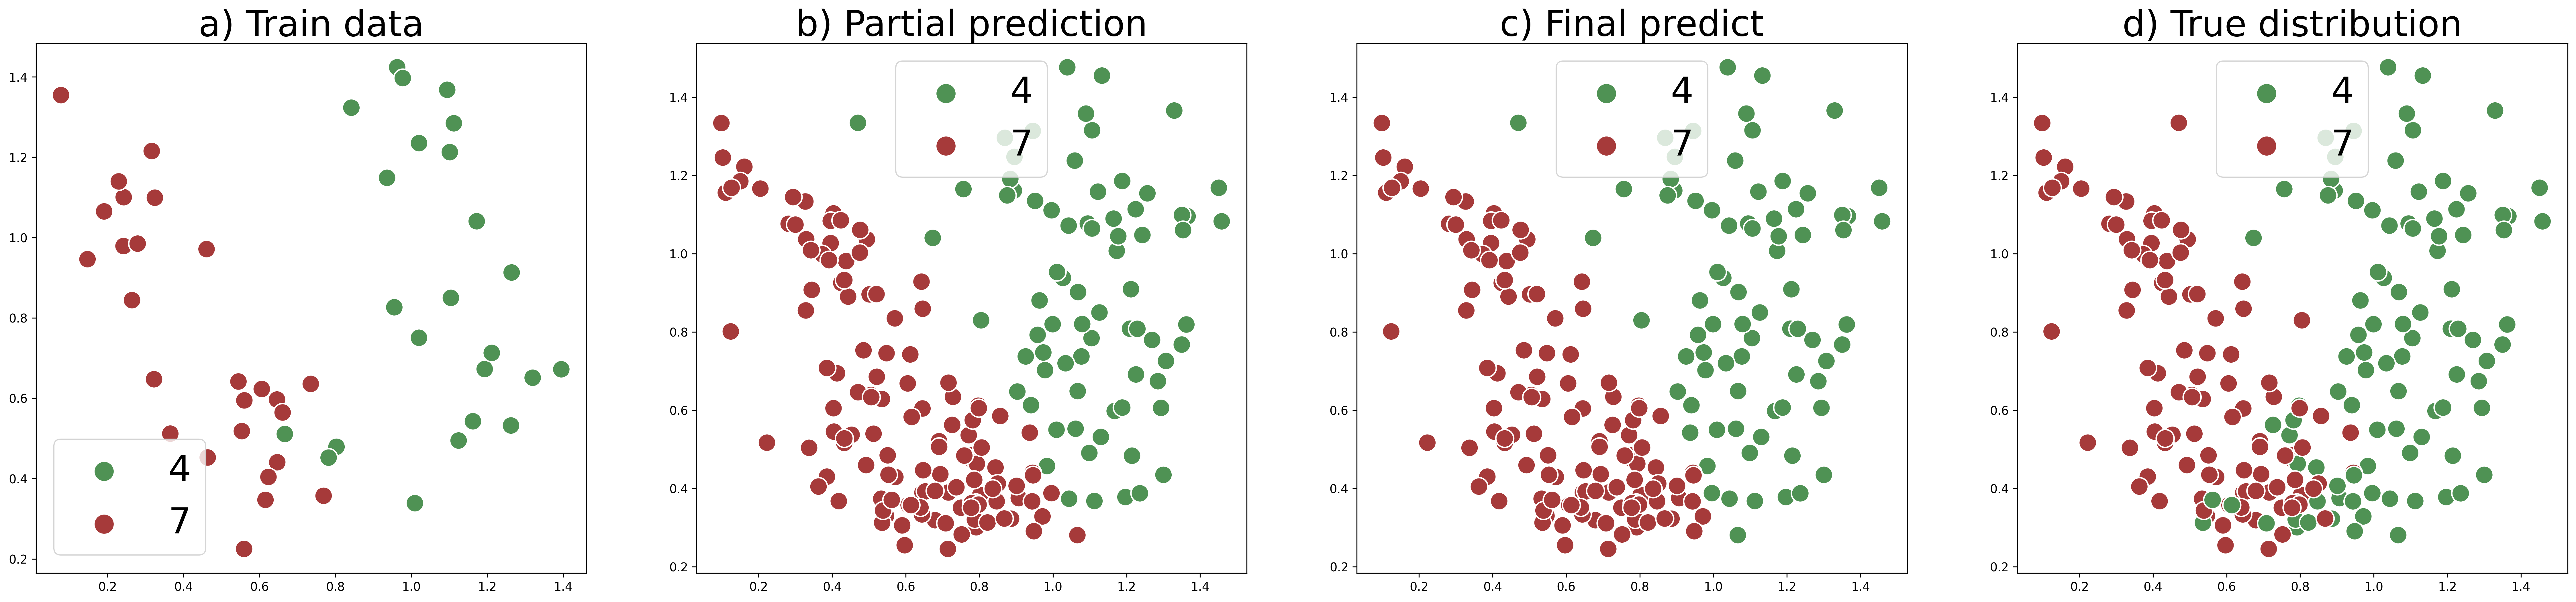

In [42]:
p = sns.diverging_palette(220, 20, as_cmap=True)
p= 'crest'
# for i, sco in enumerate(scores):
#     path = f"input_datasets/train/{id_dataset}/{id_dataset}calibtrain{i//slices}_{i%slices}"
#     traion_data, train_labels = loaddd(path)
#     b = list(map(list, zip(*traion_data)))

#     fig, axes = plt.subplots(1, 3, figsize= (28,8))
#     axes[0].set_title('Partial prediction')
#     axes[1].set_title('True distribution')
#     axes[2].set_title('Train data')
#     sns.scatterplot(x = a[0],y = a[1], hue=[7 if a > 0 else 4 for a in sco], ax=axes[0] ,palette=palette2, s = 120)#, style=Y_predicted)
#     sns.scatterplot(x = a[0],y = a[1], hue=[7 if a > 0 else 4 for a in Y_test], ax=axes[1],palette=palette2, s= 120)#, style=Y_predicted)
#     sns.scatterplot(x = b[0],y = b[1], hue=[7 if a > 0 else 4 for a in train_labels], ax=axes[2], palette=palette2, s=120)#, style=Y_predicted)
#     plt.show()
#     break
avg_scores=np.zeros((scores[0].shape[0]))
Y_predicted=np.zeros((scores[0].shape[0]),int)
    
# for i in range(0,scores[0].shape[0]):
#     tmp=0
#     for y in range(0,slices):
#         tmp=tmp+np.sign(scores[y][i])
#     avg_scores[i]=tmp   


for i in range(0,scores[0].shape[0]):
    tmp=0
    for y in range(0,slices):
        tmp=tmp+scores[y][i]
    avg_scores[i]=tmp/slices   
 

for i in range(0,scores[0].shape[0]):
    if(avg_scores[i]<0):
        Y_predicted[i]=-1.0
    else:
        Y_predicted[i]=1.0

path = f"input_datasets/train/{id_dataset}/{id_dataset}calibtrain{0}_{0}"
traion_data, train_labels = loaddd(path)
b = list(map(list, zip(*traion_data)))

fig, axes = plt.subplots(1, 4, figsize= (38,8), dpi=300)
axes[0].set_title('a) Train data'          ,fontsize=30,)
axes[1].set_title('b) Partial prediction'  ,fontsize=30,)
axes[2].set_title('c) Final predict'       ,fontsize=30,)
axes[3].set_title('d) True distribution'   ,fontsize=30,)

sns.scatterplot(x = b[0],y = b[1], hue=[7 if a > 0 else 4 for a in train_labels],   ax=axes[0], palette=palette2, s=225)#, style=Y_predicted)
sns.scatterplot(x = a[0],y = a[1], hue=[7 if a > 0 else 4 for a in scores[0]],            ax=axes[1] ,palette=palette2, s = 225)#, style=Y_predicted)
sns.scatterplot(x = a[0],y = a[1], hue=[7 if a > 0 else 4 for a in Y_predicted],    ax=axes[2], palette=palette2, s= 225)#, style=Y_predicted)
sns.scatterplot(x = a[0],y = a[1], hue=[7 if a > 0 else 4 for a in Y_test],         ax=axes[3], palette=palette2, s= 225)#, style=Y_predicted)
for ax in axes :
    lgnd = ax.legend(fontsize=30,)
    lgnd.legendHandles[0]._sizes = [225]
    lgnd.legendHandles[1]._sizes = [225]

plt.show()

# fig, axes = plt.subplots(1, 2, figsize= (9,4))
# axes[1].set_title('true dist')
# sns.scatterplot(x = a[0],y = a[1], hue=Y_test, ax=axes[1])#, style=Y_predicted)


0.875

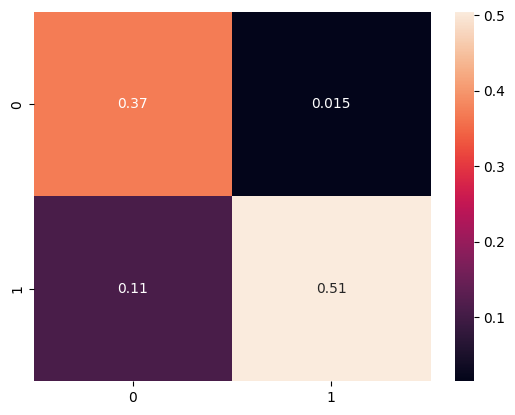

In [9]:
a = list(map(list, zip(*X_test)))
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_predicted, Y_test)/len(Y_predicted),annot=True)
accuracy_score(Y_predicted, Y_test)
#datawrite(path_test_out,'qeSVM', id_dataset, Y_predicted)

In [137]:
Y_predicted + 4*(Y_predicted != Y_test)

array([-1, -1, -1,  1,  3,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  3,  1,
        3,  1,  1,  1,  1,  1,  1, -1,  3,  1, -1, -1,  1, -1,  1,  1, -1,
        5, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1,  5,  3, -1,  1,  1,  1,  3, -1,  1,  1,  1, -1, -1,  3,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  5, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  3,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  5,  1,  1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  1,
        1,  1, -1,  3, -1,  1,  1,  5, -1, -1,  1,  3,  1, -1,  1,  1, -1,
        5, -1,  1,  1,  1,  3, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  3, -1])

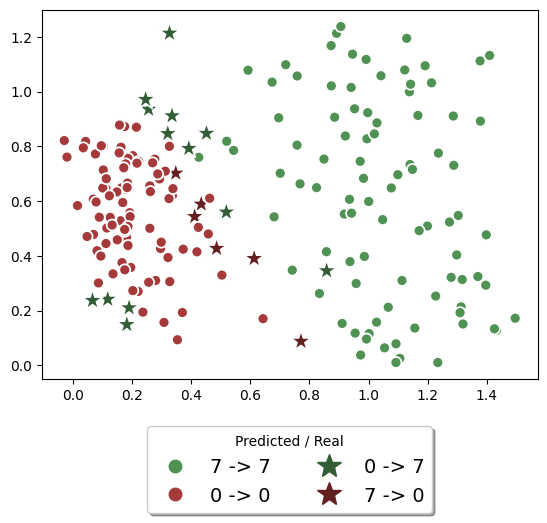

In [40]:
import matplotlib.lines as mlines
palette3 = ['#4F9254','#A63A3A','#335D36','#642020']
# fig, axes = plt.subplots(1, 1, figsize= (8,8), dpi=100)
colors = '#4F9254'
colorl = '#A63A3A'
white = '#FFFFFF'
kuku = sns.scatterplot(x = a[0],y = a[1], hue=Y_predicted + 4*(Y_predicted != Y_test),s=250, markers=['.','*'], palette=palette3, style=Y_predicted != Y_test, legend=False)
handles =     [mlines.Line2D([], [], color=white, marker='.',linewidth=5,markersize=18, label='7 -> 7', markerfacecolor=palette3[0], markeredgecolor=palette3[0])]
handles.append(mlines.Line2D([], [], color=white, marker='.',linewidth=5,markersize=18, label='0 -> 0', markerfacecolor=palette3[1], markeredgecolor=palette3[1]))
handles.append(mlines.Line2D([], [], color=white, marker='*',linewidth=5,markersize=18, label='0 -> 7', markerfacecolor=palette3[2], markeredgecolor=palette3[2]))
handles.append(mlines.Line2D([], [], color=white, marker='*',linewidth=5,markersize=18, label='7 -> 0', markerfacecolor=palette3[3], markeredgecolor=palette3[3]))

kuku.legend(handles = handles, title= 'Predicted / Real',loc='upper center',bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=2, fontsize = 14)


In [98]:
for a in datasets_ids:
    gamma=2
        f   WSGIApplication
    id_dataset='MNIST38'
    [X_train,X_test, Y_train, Y_test ]=load(id_dataset, gamma)
        from quantum_SVM import *
    from sklearn import preprocessing

    # Pre-processing the test spectra

    path_data_key='input_datasets/train/'+id_dataset+'/'
    data_key = id_dataset+'calibtrain'
    path_train_out='outputs/train/'+id_dataset+'/'
    path_test_out='outputs/test/'+id_dataset+'/'

    path_files=np.load(path_train_out+'trained_SVMs.npy')
    experiments=6
    slices=2
    scores=[]
    for j in range(0,experiments):
        for i in range(0,slices):
            scores.append(predict(path_data_key,path_files[i],X_test))
    
    avg_scores=np.zeros((scores[0].shape[0]))
    Y_predicted=np.zeros((scores[0].shape[0]),int)
        
    # for i in range(0,scores[0].shape[0]):
    #     tmp=0
    #     for y in range(0,slices):
    #         tmp=tmp+np.sign(scores[y][i])
    #     avg_scores[i]=tmp   


    for i in range(0,scores[0].shape[0]):
        tmp=0
        for y in range(0,slices):
            tmp=tmp+scores[y][i]
        avg_scores[i]=tmp/slices   
    

    for i in range(0,scores[0].shape[0]):
        if(avg_scores[i]<0):
            Y_predicted[i]=-1
        else:
            Y_predicted[i]=1
            


IndentationError: unexpected indent (3670627263.py, line 3)

MNIST09
The best hyperparameters are:
B = 2 K = 3 xi = 1 gamma = 2.0
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	-20.0000	  0.8800	  0.9710	  0.9674	  0.8280	  0.9294	  0.9277
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST09_runMNIST09calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_couplers=11175_0
saved as /home/fi_ippo/Desktop/prova 2 qsvm/tmp/mine/outputs/train/MNIST09/runMNIST09calibtrain0_2_B=2_K=3_xi=1_gamma=2.0/result_couplers=11175_home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST09_runMNIST09calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_couplers=11175_0.pdf
MNIST38
The best hyperparameters are:
B = 2 K = 3 xi = 1 gamma = 2.0
idx   	sum_antn	trainacc	trainauroc	trainauprc	testacc  	testauroc	testauprc
0	 17.0000	  0.8000	  0.8792	  0.8318	  0.8440	  0.9219	  0.8596
saved data for _home_fi_ippo_Desktop_prova 2 qsvm_tmp_mine_outputs_train_MNIST38_runMNIST38calibtrain0_2_B=2_K=3_xi=1_gamma=2.0_result_coupler

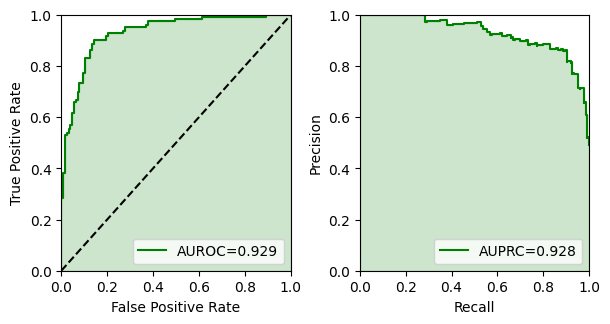

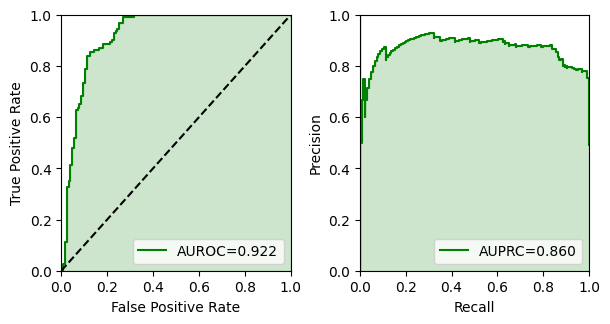

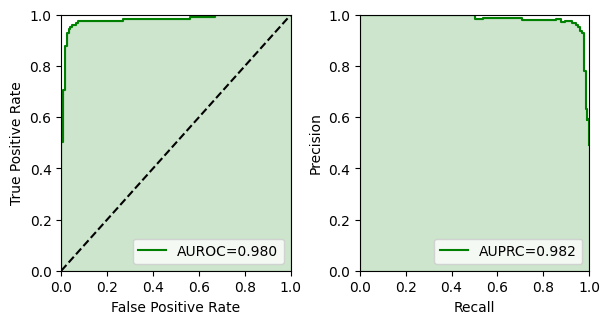

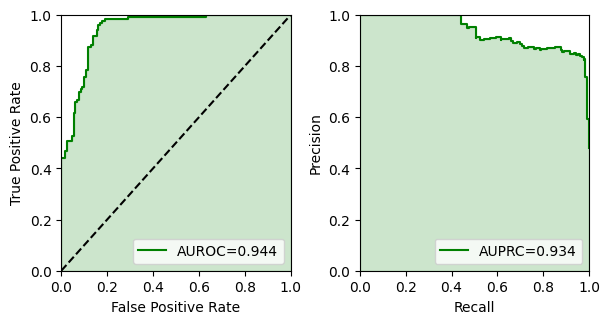

In [ ]:

    print(id_dataset)
    # Get the calibration results
    path_out='outputs/calibration/'+id_dataset+'/'
    hyperparameters=np.load(path_out+'hyperparameters.npy')
    testauprc_all=np.load(path_out+'testauprc_all.npy')
    # # Select the best hyperparameter set for the max value of testauprc
    idx_max = np.where(testauprc_all == np.amax(testauprc_all))
    B=int(hyperparameters[int(idx_max[0]),0])
    K=int(hyperparameters[int(idx_max[0]),1])
    xi=int(hyperparameters[int(idx_max[0]),2])
    gamma=hyperparameters[int(idx_max[0]),3]
    print('The best hyperparameters are:\n'+'B = '+str(B)+' K = '+str(K)+' xi = '+str(xi)+' gamma = '+str(gamma))

    homepath = '/home/fi_ippo/Desktop/prova 2 qsvm/tmp/mine/'
    path_data_key='input_datasets/train/'+id_dataset+'/'
    puyh=homepath + f'outputs/train/{id_dataset}/run{id_dataset}calibtrain0_{int(idx_max[0])}_B={B}_K={K}_xi={xi}_gamma=2.0/'
    wuwu = [i[0] for i in os.walk(puyh)][1]
    eval_run_rocpr_curves(path_data_key,wuwu, 'saveplot')

In [ ]:
print([x for x in os.walk('/home/fi_ippo/Desktop/prova 2 qsvm/tmp/mine/outputs/train/MNIST47/runMNIST47calibtrain0_4_B=2_K=3_xi=1_gamma=2.0')])


[]


In [9]:
import pandas as pd
df = pd.read_csv('tmp.csv')
print(df.max() -df.min() )
df.describe()

trainacc      0.2105
trainauroc    0.1978
trainauprc    0.1660
testacc       0.2264
testauroc     0.2270
testauprc     0.2223
dtype: float64


trainacc  trainauroc  trainauprc   testacc  testauroc  testauprc
count  8.000000    8.000000    8.000000  8.000000   8.000000   8.000000
mean   0.772388    0.826788    0.789338  0.783338   0.844975   0.816875
std    0.089479    0.075084    0.062707  0.097002   0.085192   0.085061
min    0.656200    0.710500    0.699000  0.650000   0.710200   0.684400
25%    0.682275    0.765250    0.734000  0.687525   0.772525   0.742175
50%    0.797900    0.843550    0.795750  0.817350   0.875500   0.851100
75%    0.850525    0.890950    0.842350  0.868075   0.911475   0.877350
max    0.866700    0.908300    0.865000  0.876400   0.937200   0.906700